In [15]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# Training points are every 0.1 in [0,1] (note that they're the same for both tasks)
train_x = torch.linspace(0, 1, 11).view(-1, 1)
# y1s are indexed 0, y2s are indexed 1
y1_inds = torch.zeros(11).long()
y2_inds = torch.ones(11).long()
# y1 function is sin(2*pi*x) with noise N(0, 0.04)
train_y1 = torch.sin(train_x.data * (2 * math.pi)) + torch.randn(train_x.size()) * 0.2
# y2 function is cos(2*pi*x) with noise N(0, 0.04)
train_y2 = torch.cos(train_x.data * (2 * math.pi)) + torch.randn(train_x.size()) * 0.2

In [17]:
from torch import optim

In [29]:
train_y = torch.cat((train_y1, train_y2), dim=1).contiguous()
print(train_y)

tensor([[ 0.0308,  0.6788],
        [ 0.6347,  0.7760],
        [ 0.9018,  0.2362],
        [ 1.1418, -0.2871],
        [ 0.5265, -0.2662],
        [ 0.2939, -0.9759],
        [-0.6957, -0.7333],
        [-1.3008, -0.3974],
        [-0.8516,  0.1326],
        [-0.5907,  0.7687],
        [-0.2300,  1.0844]])


In [95]:
from multitaskgp import ExactMultitaskGP
from kernels import RQ_Constant, RBF

In [96]:
model = ExactMultitaskGP(train_x,train_y, kernel=RBF(), rank=1)

torch.Size([11, 1])


In [97]:
model.fit(lr=0.1, max_epoch=100)

tensor(27.2951)
Epoch: 1, Loss: 27.295066833496094
tensor(26.6119)
Epoch: 2, Loss: 26.611949920654297
tensor(25.9936)
Epoch: 3, Loss: 25.993623733520508
tensor(25.4530)
Epoch: 4, Loss: 25.453022003173828
tensor(24.9808)
Epoch: 5, Loss: 24.98078155517578
tensor(24.5602)
Epoch: 6, Loss: 24.560197830200195
tensor(24.1854)
Epoch: 7, Loss: 24.18536376953125
tensor(23.8555)
Epoch: 8, Loss: 23.855493545532227
tensor(23.5737)
Epoch: 9, Loss: 23.573671340942383
tensor(23.3466)
Epoch: 10, Loss: 23.346590042114258
tensor(23.1804)
Epoch: 11, Loss: 23.180368423461914
tensor(23.0681)
Epoch: 12, Loss: 23.06808090209961
tensor(22.9795)
Epoch: 13, Loss: 22.979488372802734
tensor(22.8742)
Epoch: 14, Loss: 22.874210357666016
tensor(22.7175)
Epoch: 15, Loss: 22.717451095581055
tensor(22.4860)
Epoch: 16, Loss: 22.4859676361084
tensor(22.1697)
Epoch: 17, Loss: 22.169677734375
tensor(21.7646)
Epoch: 18, Loss: 21.764583587646484
tensor(21.2660)
Epoch: 19, Loss: 21.266048431396484
tensor(20.6895)
Epoch: 20, Lo

In [98]:
test_x = torch.linspace(0, 1, 51).view(-1, 1)
fmean = model.predict(test_x)[-1]

In [99]:
print(fmean)

tensor([[ 0.1106,  0.0052],
        [ 0.1947,  0.0092],
        [ 0.2831,  0.0134],
        [ 0.3741,  0.0177],
        [ 0.4660,  0.0221],
        [ 0.5568,  0.0264],
        [ 0.6447,  0.0306],
        [ 0.7277,  0.0345],
        [ 0.8038,  0.0381],
        [ 0.8714,  0.0413],
        [ 0.9288,  0.0441],
        [ 0.9744,  0.0462],
        [ 1.0070,  0.0478],
        [ 1.0253,  0.0486],
        [ 1.0285,  0.0488],
        [ 1.0157,  0.0482],
        [ 0.9866,  0.0468],
        [ 0.9409,  0.0446],
        [ 0.8786,  0.0417],
        [ 0.8002,  0.0380],
        [ 0.7063,  0.0335],
        [ 0.5980,  0.0284],
        [ 0.4768,  0.0226],
        [ 0.3447,  0.0163],
        [ 0.2039,  0.0097],
        [ 0.0570,  0.0027],
        [-0.0929, -0.0044],
        [-0.2427, -0.0115],
        [-0.3889, -0.0184],
        [-0.5283, -0.0251],
        [-0.6575, -0.0312],
        [-0.7735, -0.0367],
        [-0.8736, -0.0414],
        [-0.9557, -0.0453],
        [-1.0181, -0.0483],
        [-1.0599, -0

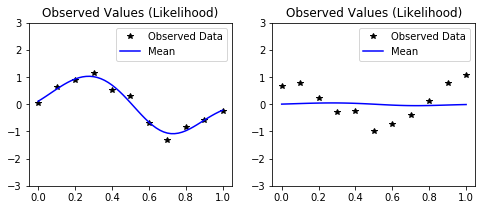

In [100]:
f, (y1_ax, y2_ax) = plt.subplots(1, 2, figsize=(8, 3))
def ax_plot(ax, train_y, rand_var, title):
    # Plot training data as black stars
    ax.plot(train_x.data.numpy(), train_y.data.numpy(), 'k*')
    # Predictive mean as blue line
    ax.plot(test_x.data.numpy(), rand_var.detach().numpy(), 'b')
    # Shade in confidence 
    ax.set_ylim([-3, 3])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])
    ax.set_title(title)
ax_plot(y1_ax, train_y1, fmean[:, 0], 'Observed Values (Likelihood)')
ax_plot(y2_ax, train_y2, fmean[:, 1], 'Observed Values (Likelihood)')

In [101]:
print(model.task_kernel())

tensor([[ 2.9770,  0.1412],
        [ 0.1412,  0.0067]])


In [102]:
print(model.log_noise.exp())

tensor([ 0.0346,  0.4276])
